In [86]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [87]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.shape

(9134, 24)

In [88]:
data2 = data.copy()
data2.columns = [c.lower().replace(' ', '_') for c in data.columns]
data2 = data2.drop_duplicates()
data2.shape

(9134, 24)

In [89]:
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


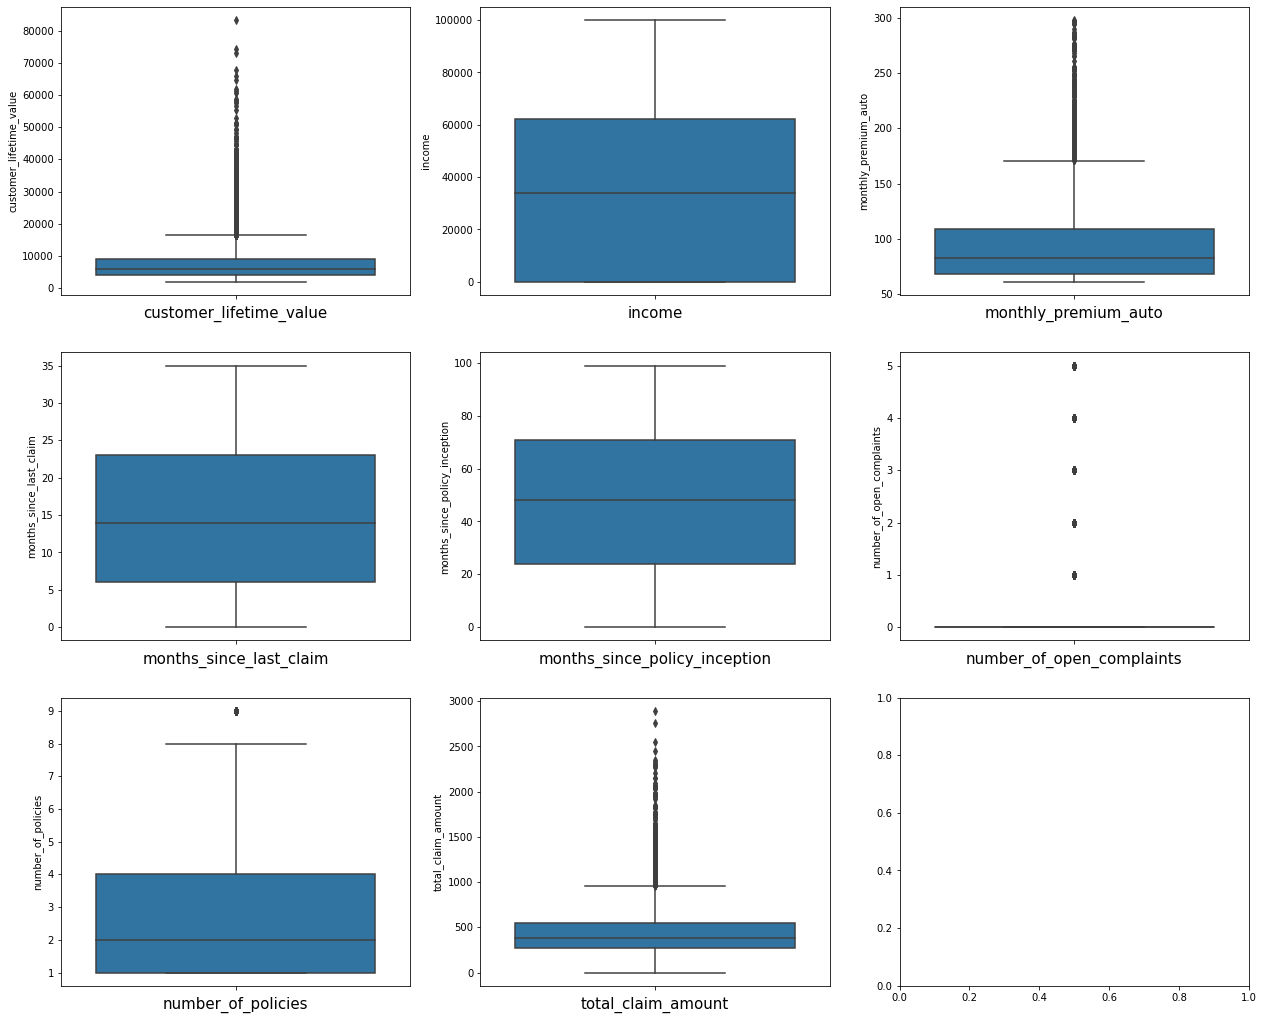

In [90]:
fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(12,18))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(data2.select_dtypes(np.number), 1):
    plt.subplot (3, 3, i)
    sns.boxplot(y=feature, data=data2.select_dtypes(np.number))
    plt.xlabel('{}'.format(feature), size = 15)
plt.show()

In [91]:
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [92]:
def remove_outliers(df, feature, factor):
    iqr = np.percentile(df[feature],75) - np.percentile(df[feature],25)
    upper_limit = np.percentile(df[feature],75) + factor*iqr
    lower_limit = np.percentile(df[feature],25) - factor*iqr
    df = df[(df[feature]>lower_limit) & 
                  (df[feature]<upper_limit)]
    return df

In [93]:
data3 = remove_outliers(data2, 'customer_lifetime_value', 3)

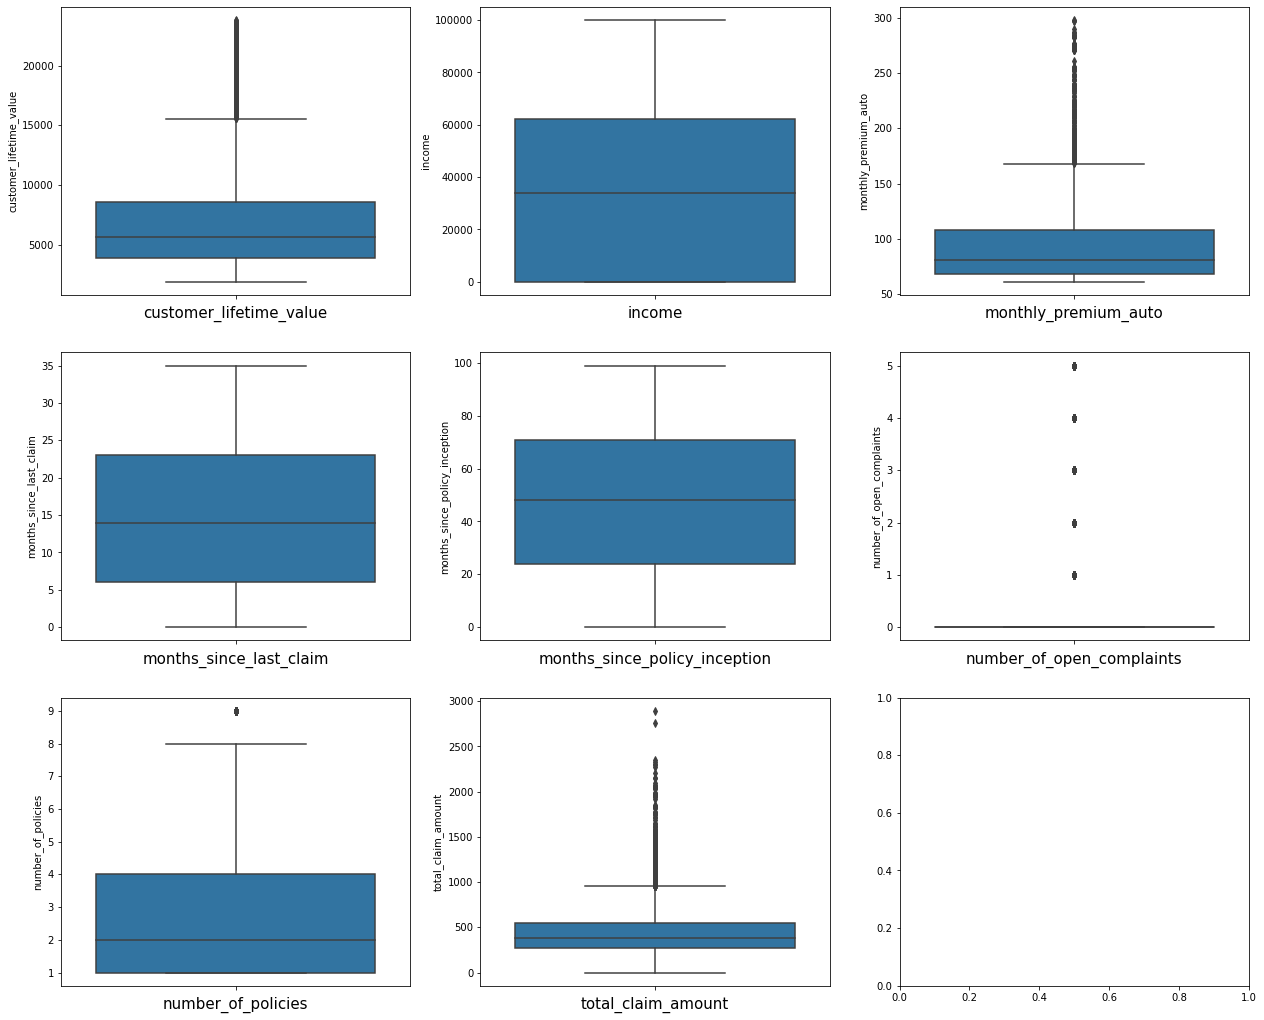

In [94]:
fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(12,18))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(data3.select_dtypes(np.number), 1):
    plt.subplot (3, 3, i)
    sns.boxplot(y=feature, data=data3.select_dtypes(np.number))
    plt.xlabel('{}'.format(feature), size = 15)
plt.show()

In [95]:
numerical = data3.select_dtypes(include=np.number).replace(np.nan, 0).fillna(0) #continues
categorical = data3.select_dtypes(include=np.object).replace(np.nan, 'no_value').drop(['customer'], axis=1) #discrete

In [97]:
def numerical_hist(numerical):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(numerical):
        plt.figure(i)
        sns.distplot(numerical[col])
        plt.show()

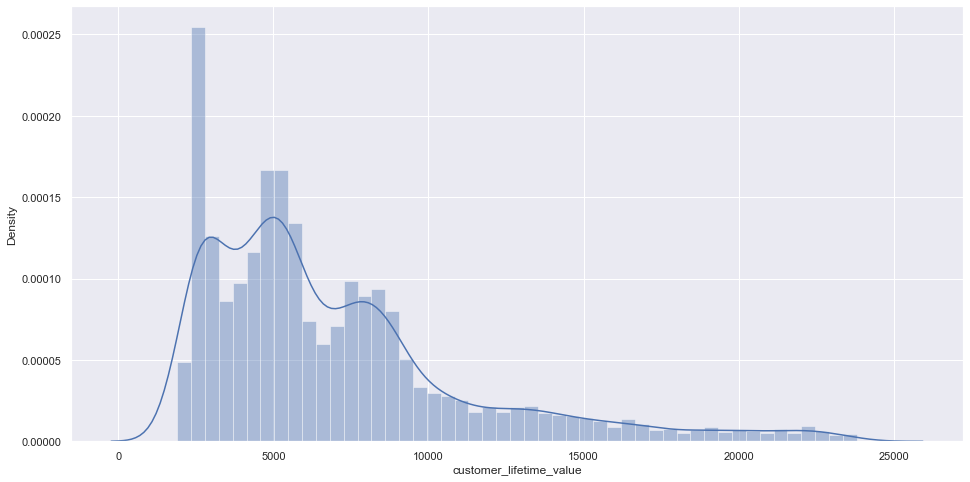

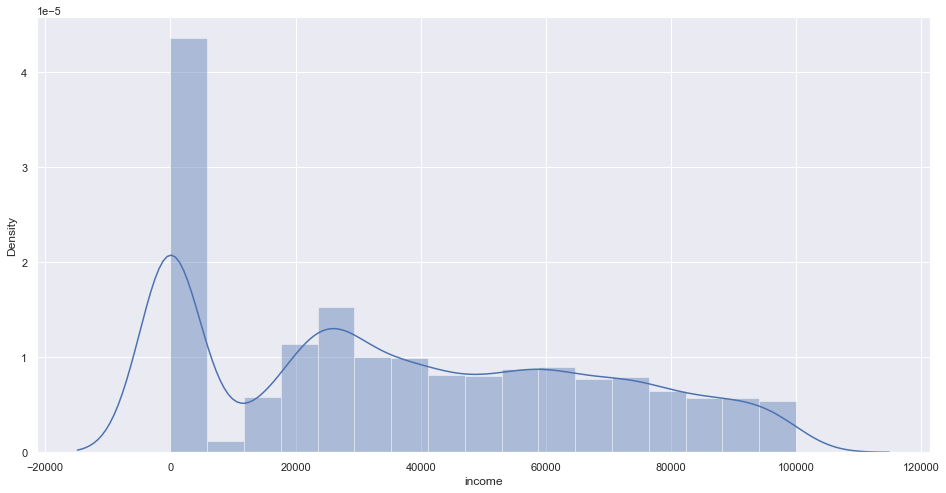

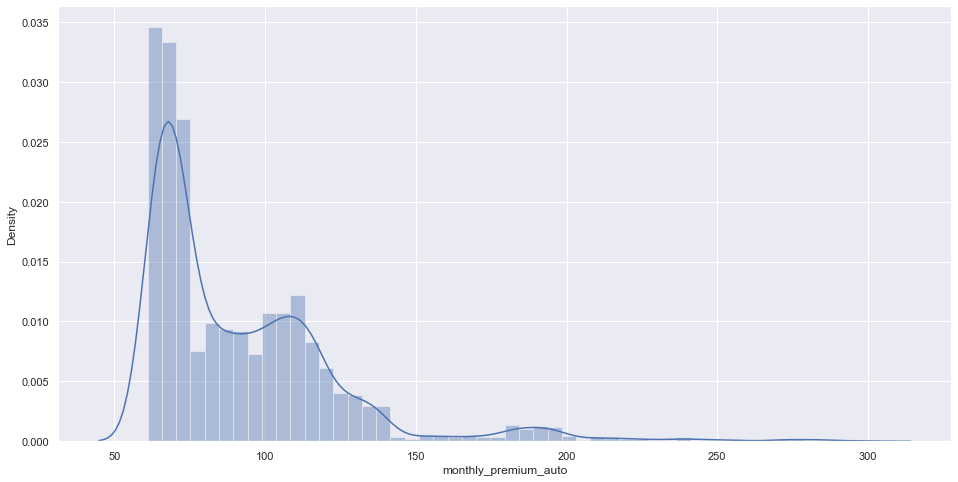

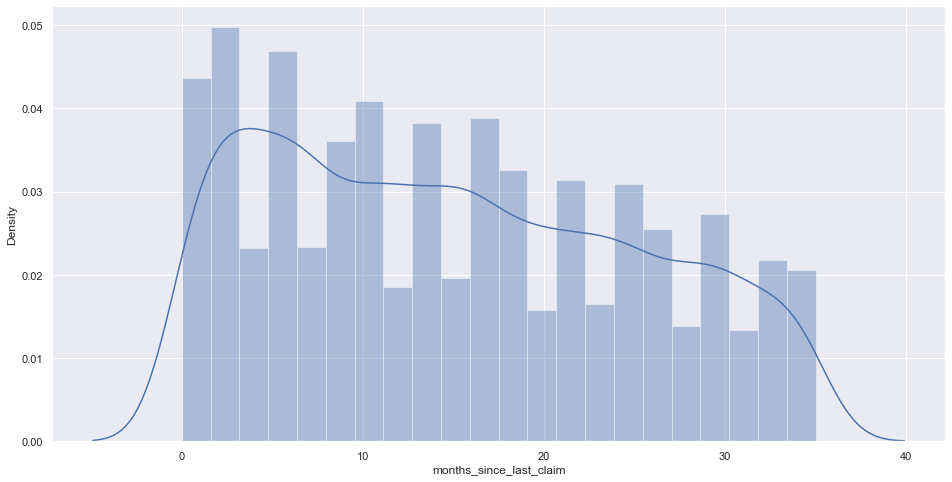

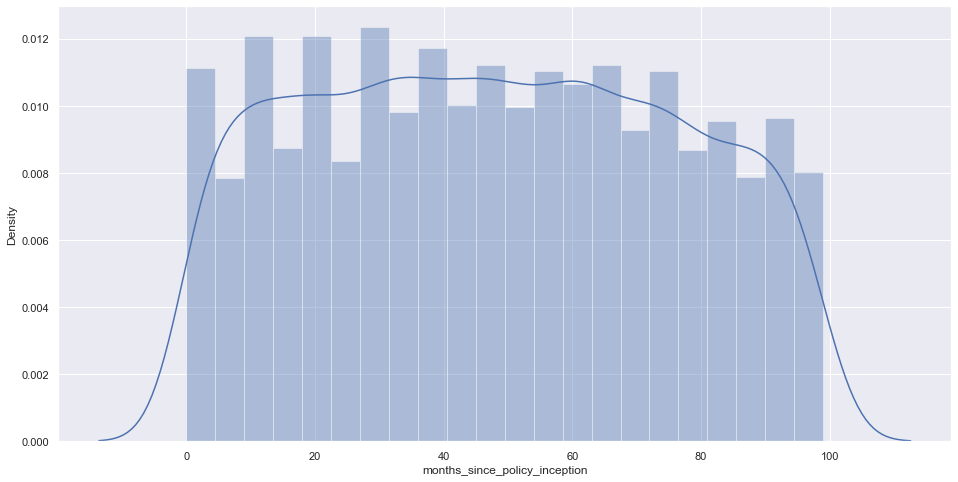

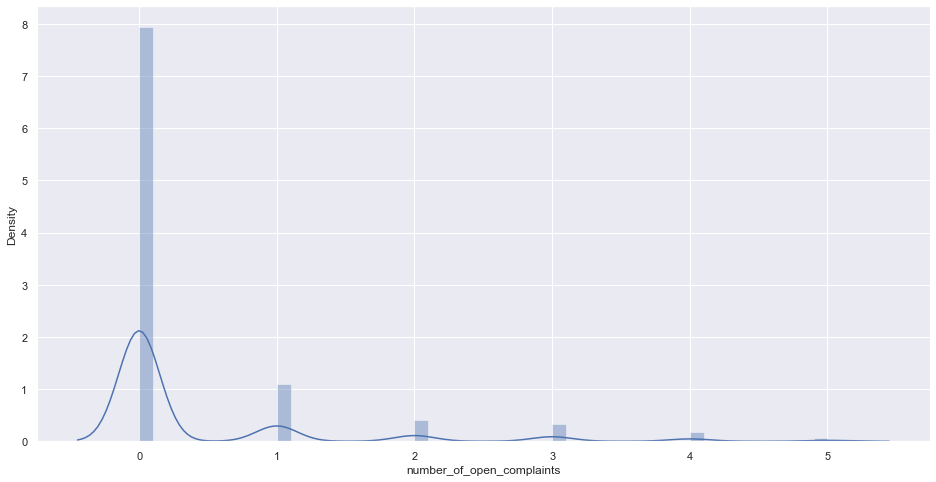

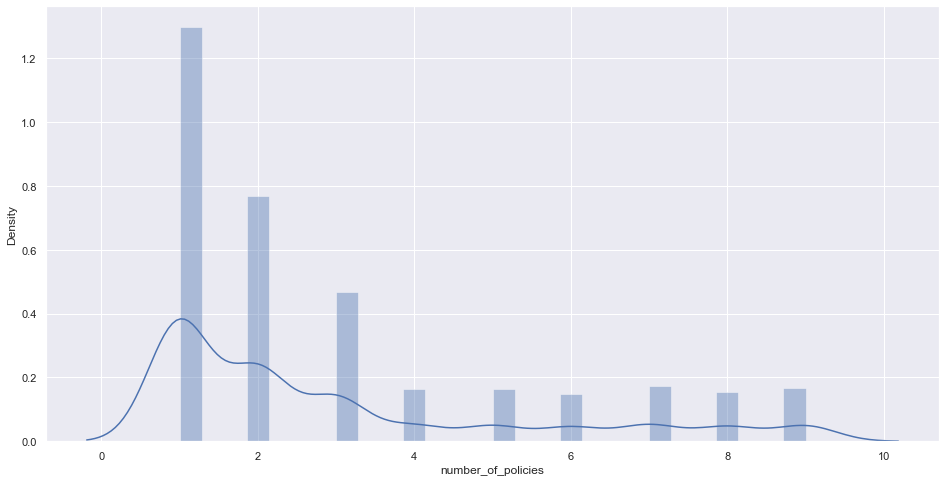

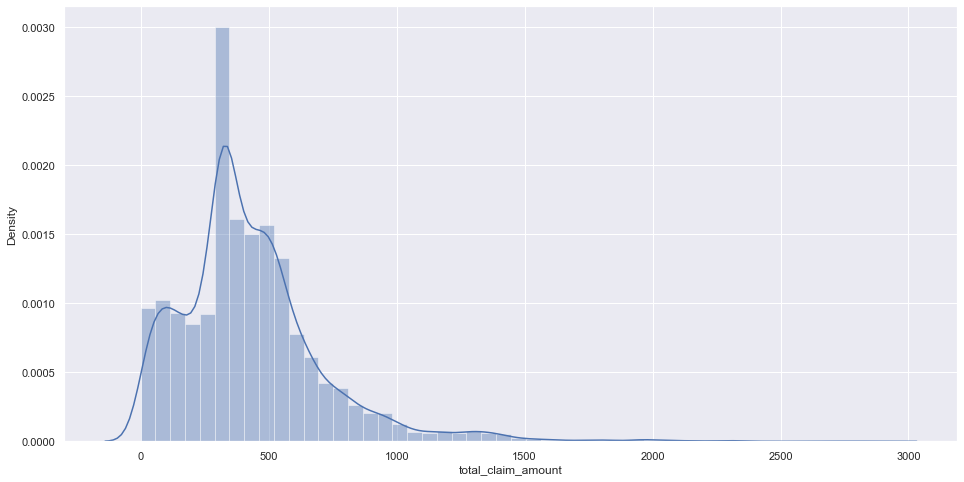

In [98]:
numerical_hist(numerical)

In [100]:
categorical['effective_to_date']=pd.to_datetime(data2['effective_to_date'])   # datetime
categorical.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [101]:
categorical['year'] = categorical['effective_to_date'][0].year
categorical['month'] = categorical['effective_to_date'][0].month
categorical['day'] = categorical['effective_to_date'][0].day
categorical['weekday'] = categorical['effective_to_date'][0].isoweekday()
categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,year,month,day,weekday
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011,2,24,4
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011,2,24,4
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011,2,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011,2,24,4
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011,2,24,4


In [102]:
categorical2 = categorical.drop(['effective_to_date'], axis=1)
categorical2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,year,month,day,weekday
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011,2,24,4
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011,2,24,4
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011,2,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011,2,24,4
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011,2,24,4


In [103]:
categorical2['year'] = categorical2['year'].astype('object')
categorical2['month'] = categorical2['month'].astype('object')
categorical2['day'] = categorical2['day'].astype('object')
categorical2['weekday'] = categorical2['weekday'].astype('object')
categorical2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,year,month,day,weekday
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011,2,24,4
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24,4
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011,2,24,4
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011,2,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011,2,24,4
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011,2,24,4
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011,2,24,4


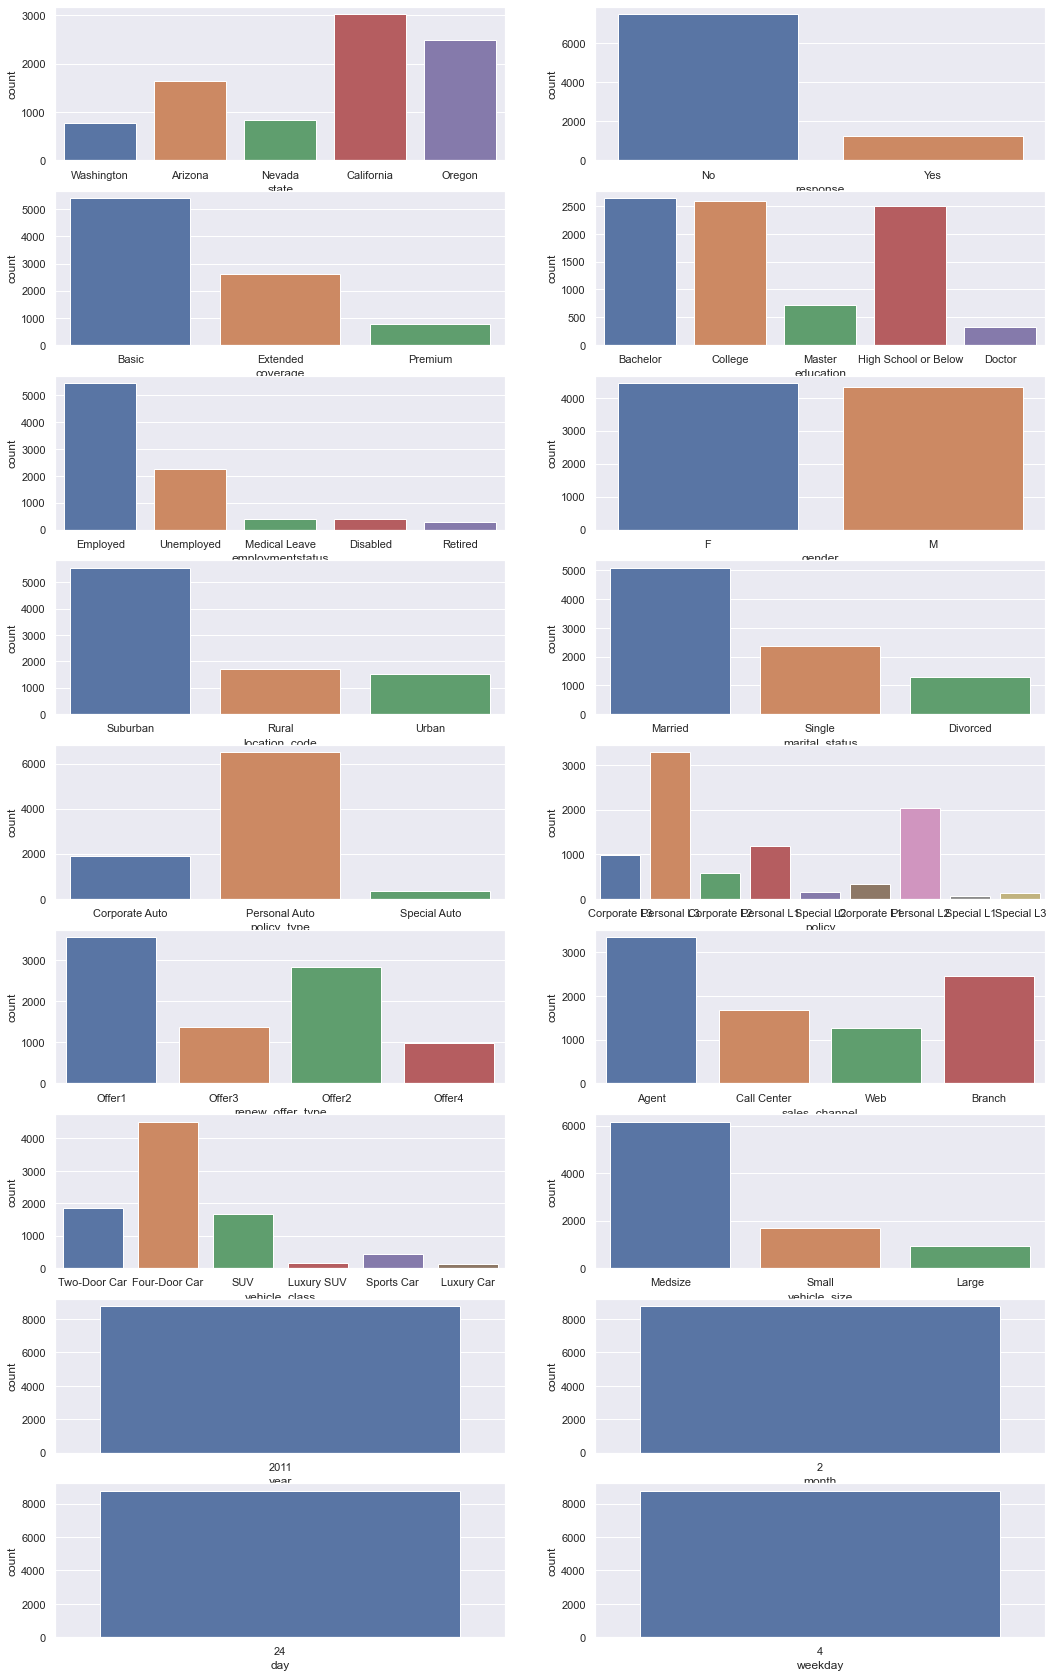

In [104]:
data_cats_cols = categorical2.columns
fig,axs = plt.subplots(ncols=9, nrows=2, figsize =(10, 30))
plt.subplots_adjust(right=1.5)
for i, feature in enumerate(data_cats_cols, 1):
    plt.subplot(9, 2, i)
    sns.countplot(x = feature, data = categorical2)
plt.show()

In [105]:
x=numerical.drop(['customer_lifetime_value'], axis = 1)

In [110]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
flag = True
threshold = 50
while flag is True:
    flag = False
    values = [variance_inflation_factor(np.array(x), i) for i in np.arange(x.shape[1])]
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = x.columns[col_index]
        x = x.drop([column_name], axis=1)
        flag = True

In [109]:
x.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


In [111]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x)
x_standardized = transformer.transform(x)
x_standardized

array([[ 6.13083023e-01, -6.93035919e-01,  1.67918867e+00, ...,
        -4.22305865e-01, -8.25308130e-01, -1.50726718e-01],
       [-1.23511714e+00,  6.31967992e-02, -2.10816225e-01, ...,
        -4.22305865e-01,  2.05489287e+00,  2.47379157e+00],
       [ 3.66531532e-01,  4.86687121e-01,  2.86553485e-01, ...,
        -4.22305865e-01, -4.13850844e-01,  4.87819402e-01],
       ...,
       [-1.23511714e+00, -2.09046979e-01, -6.08711992e-01, ...,
         2.84543952e+00, -4.13850844e-01,  1.27628775e+00],
       [-5.14511534e-01,  1.23695417e-01,  1.87813656e+00, ...,
        -4.22305865e-01, -2.39355784e-03,  9.26242503e-01],
       [-1.23511714e+00, -4.51041449e-01, -1.20555564e+00, ...,
        -4.22305865e-01, -8.25308130e-01, -2.04194515e-01]])

In [112]:
categorical3 = categorical2.drop(['response', 'year', 'month', 'day', 'renew_offer_type', 'policy_type', 'vehicle_size'], axis=1)

In [113]:
categorical3

,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy,sales_channel,vehicle_class,weekday
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Agent,Two-Door Car,4
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Agent,Four-Door Car,4
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Agent,Two-Door Car,4
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Call Center,SUV,4
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Agent,Four-Door Car,4
...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Web,Four-Door Car,4
9130,California,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Branch,Four-Door Car,4
9131,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Branch,Four-Door Car,4
9132,California,Extended,College,Employed,M,Suburban,Married,Personal L2,Branch,Four-Door Car,4


In [114]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categorical3)
encoded = encoder.transform(categorical3).toarray()

In [117]:
x = np.concatenate((x_standardized, encoded), axis=1)
xdata = pd.DataFrame(x)

In [118]:
xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.613083,-0.693036,1.679189,-1.541880,-0.422306,-0.825308,-0.150727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.235117,0.063197,-0.210816,-0.214502,-0.422306,2.054893,2.473792,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.366532,0.486687,0.286553,-0.358002,-0.422306,-0.413851,0.487819,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.235117,0.426189,0.286553,0.610625,-0.422306,1.643436,0.359201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.204583,-0.572039,-0.310290,-0.142752,-0.422306,-0.825308,-1.017818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [122]:
y = data3['customer_lifetime_value']
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 8767, dtype: float64

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.17609805130749234

In [134]:
r_squared = r2_score(y_test, predictions)
r_squared

0.143719733891561

In [136]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjusted_r_squared

0.13333758285906838

In [125]:
x2 = x_standardized
y2 = y

In [126]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.4, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(x2_train,y2_train)
predictions  = lm.predict(x2_test)
r2_score(y2_test, predictions)

0.17016886660691133

In [137]:
r2_squared = r2_score(y2_test, predictions)
r2_squared

0.143719733891561

In [138]:
adjusted_r2_squared = 1 - (1-r2_squared)*(len(y2_test)-1)/(len(y2_test)-x2_test.shape[1]-1)
adjusted_r2_squared

0.14200668391649407

In [127]:
x3 = encoded
y3 = y

In [128]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.4, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(x3_train,y3_train)
predictions  = lm.predict(x3_test)
r2_score(y3_test, predictions)

0.143719733891561

In [141]:
r3_squared = r2_score(y3_test, predictions)
r3_squared

0.143719733891561

In [142]:
adjusted_r3_squared = 1 - (1-r3_squared)*(len(y3_test)-1)/(len(y3_test)-x3_test.shape[1]-1)
adjusted_r3_squared

0.13508538951996907

In [149]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=20)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.20517495179938905

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(5,70,5): #from 5 to 40 and 3 is a step
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

Text(0, 0.5, 'Accuracy')

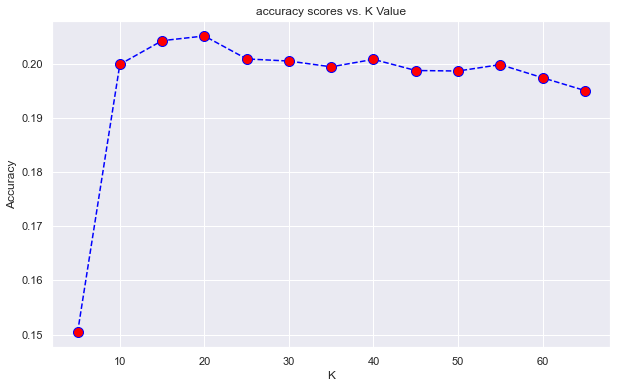

In [146]:
plt.figure(figsize=(10,6))
plt.plot(range(5,70,5),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [147]:
complexities = []
for i in range(5,70,5):
    complexities.append(np.log(1/i))

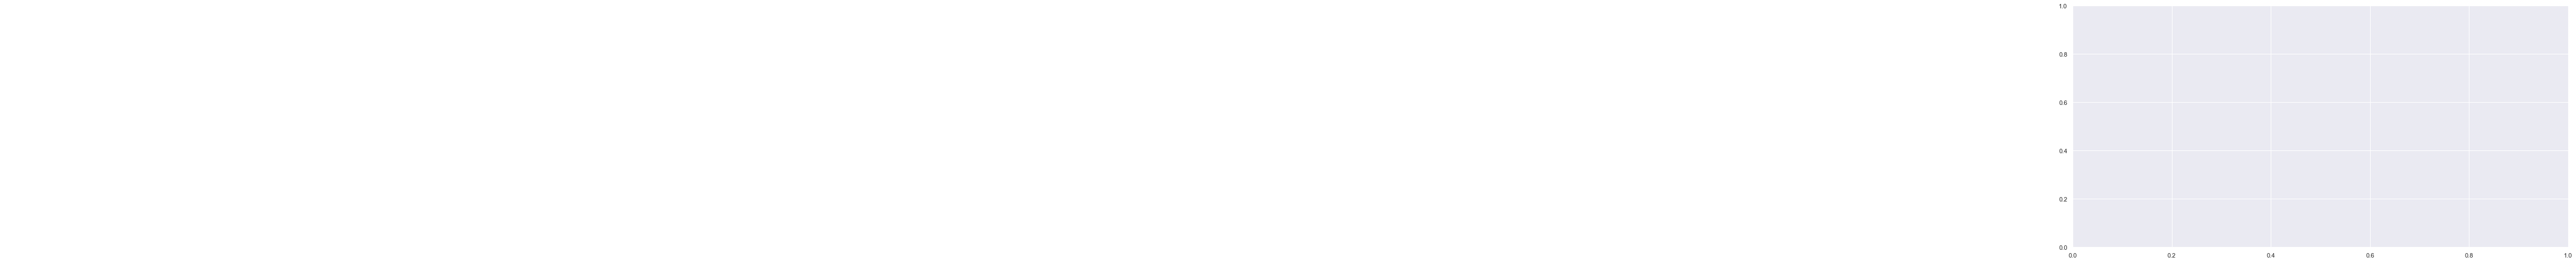

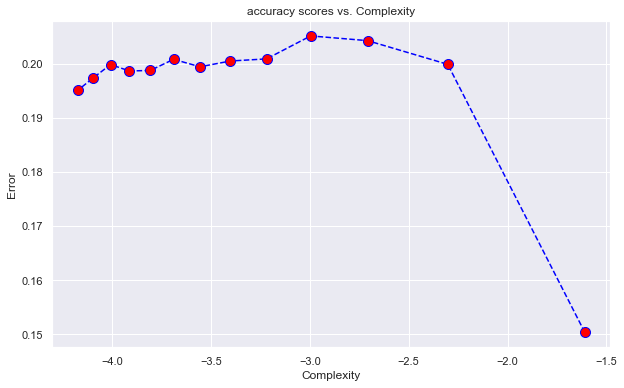

In [148]:
fig, ax = plt.subplots(1,1)

plt.figure(figsize=(10,6))
plt.plot(complexities,scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. Complexity')
plt.xlabel('Complexity')
plt.ylabel('Error') #

k = np.arange(5,70,5)
for i, txt in enumerate(k):
    ax.annotate(txt, (complexities[i], scores[i])) 
    #Complexity decreases to your left on the chart

In [152]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
x, y = make_regression(n_samples=200, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
regr.predict(x_test[:2])
regr.score(x_test, y_test)

0.4162338898076593